In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-in-the-pregnancy-during-the-covid-19/Pregnancy During the COVID-19 Pandemic.csv


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [3]:
df = pd.read_csv("/kaggle/input/mental-health-in-the-pregnancy-during-the-covid-19/Pregnancy During the COVID-19 Pandemic.csv")

In [4]:
df.head()

,OSF_ID,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Language,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,1,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,English,2,3,27
1,2,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,English,2,33,92
2,3,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,,,
3,4,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,French,53,67,54
4,5,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,English,23,32,71


In [5]:
df.drop(columns = ["OSF_ID","Language"],inplace = True)

In [6]:
# missing values
df.isnull().mean() *100

Maternal_Age                                   1.030449
Household_Income                               2.330115
Maternal_Education                             1.643149
Edinburgh_Postnatal_Depression_Scale          10.898626
PROMIS_Anxiety                                11.195693
Gestational_Age_At_Birth                      37.486075
Delivery_Date(converted to month and year)    37.495358
Birth_Length                                  49.127367
Birth_Weight                                  43.575938
Delivery_Mode                                 48.598218
NICU_Stay                                     48.626068
Threaten_Life                                  0.000000
Threaten_Baby_Danger                           0.000000
Threaten_Baby_Harm                             0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Maternal_Age                                10661 non-null  float64
 1   Household_Income                            10521 non-null  object 
 2   Maternal_Education                          10595 non-null  object 
 3   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 4   PROMIS_Anxiety                              9566 non-null   float64
 5   Gestational_Age_At_Birth                    6734 non-null   float64
 6   Delivery_Date(converted to month and year)  6733 non-null   object 
 7   Birth_Length                                5480 non-null   float64
 8   Birth_Weight                                6078 non-null   float64
 9   Delivery_Mode                               5537 non-null   object 
 10  NICU_Stay 

In [8]:
# lets plot numerical grapha 
numerical_df = df.select_dtypes(include = ["number"])
numerical_df.head()

,Maternal_Age,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Birth_Length,Birth_Weight
0,38.3,9.0,13.0,39.71,49.20,3431.0
1,34.6,4.0,17.0,NaN,NaN,NaN
2,34.3,NaN,NaN,NaN,NaN,NaN
3,28.8,9.0,20.0,38.57,41.00,2534.0
4,36.5,14.0,20.0,39.86,53.34,3714.0


In [9]:
print(df["Household_Income"].value_counts)
print("")
print(df["Maternal_Education"].value_counts)
print("")
print(df["Delivery_Mode"].value_counts)
print("")
print(df["NICU_Stay"].value_counts)



<bound method IndexOpsMixin.value_counts of 0                 $200,000+
1                 $200,000+
2        $100,000 -$124,999
3        $100,000 -$124,999
4           $40,000-$69,999
                ...        
10767    $100,000 -$124,999
10768    $125,000- $149,999
10769      $20,000- $39,999
10770      $20,000- $39,999
10771       $70,000-$99,999
Name: Household_Income, Length: 10772, dtype: object>

<bound method IndexOpsMixin.value_counts of 0              Masters degree
1        Undergraduate degree
2        Undergraduate degree
3              Masters degree
4        Undergraduate degree
                 ...         
10767    Undergraduate degree
10768    Undergraduate degree
10769    College/trade school
10770    College/trade school
10771          Masters degree
Name: Maternal_Education, Length: 10772, dtype: object>

<bound method IndexOpsMixin.value_counts of 0                            Vaginally
1                                  NaN
2                                  NaN
3

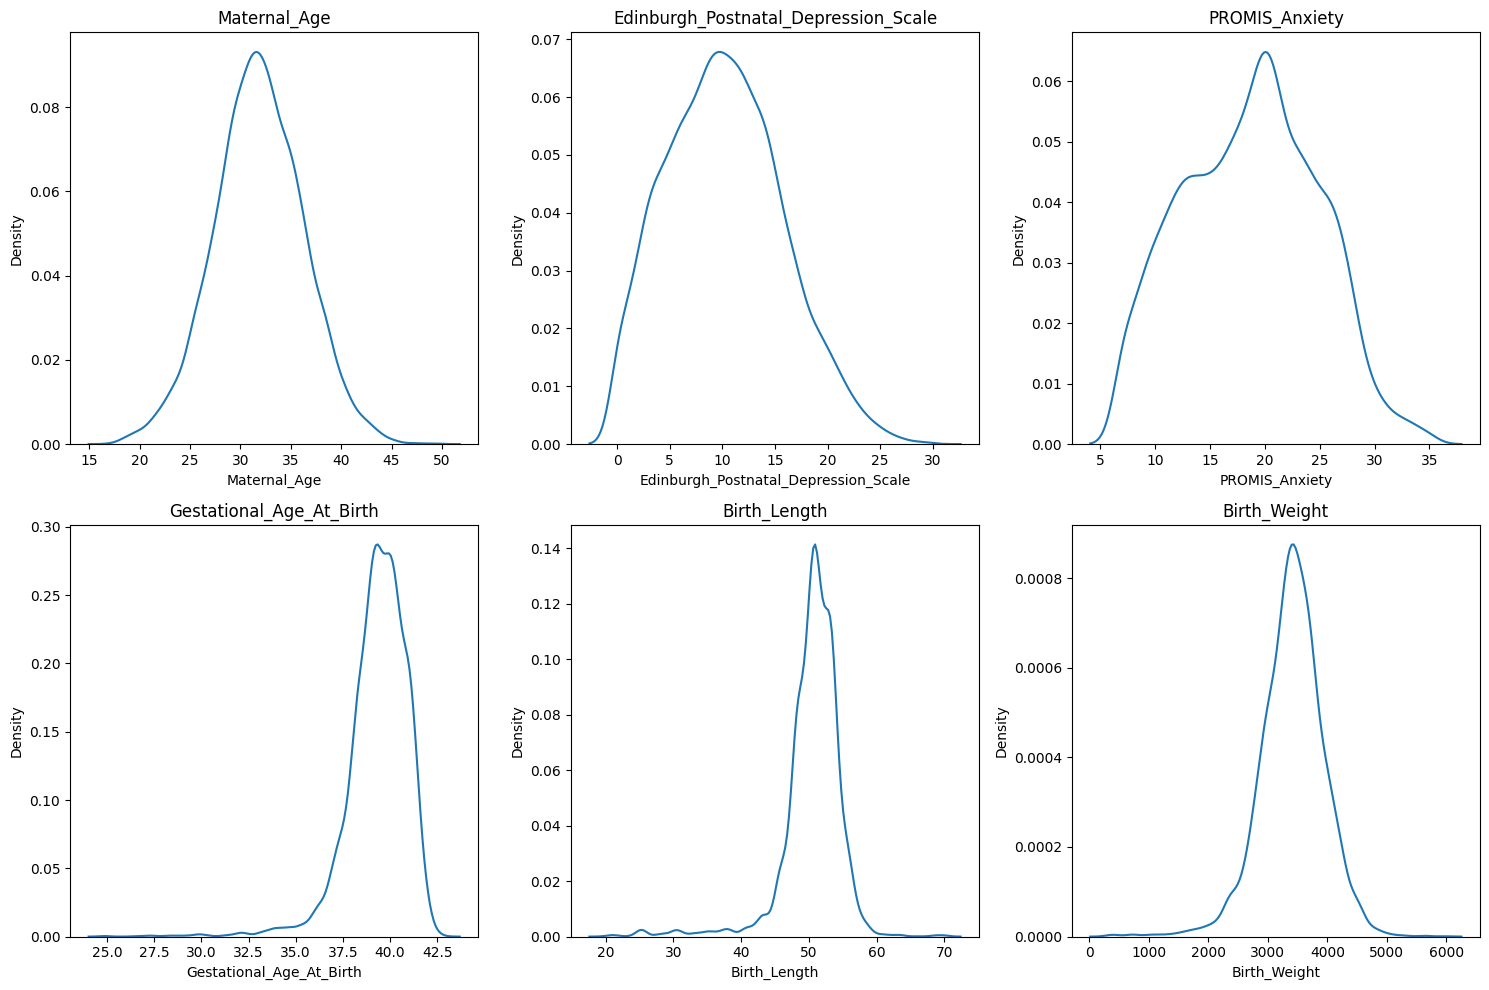

In [10]:
fig, axs = plt.subplots(2,3, figsize =(15,10))
axs = axs.flatten()

for i, col in enumerate(numerical_df.columns):
    if i< 6:
        sns.kdeplot(data=numerical_df[col],ax = axs[i])
        axs[i].set_title(col)
plt.tight_layout()
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Maternal_Age                                10661 non-null  float64
 1   Household_Income                            10521 non-null  object 
 2   Maternal_Education                          10595 non-null  object 
 3   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 4   PROMIS_Anxiety                              9566 non-null   float64
 5   Gestational_Age_At_Birth                    6734 non-null   float64
 6   Delivery_Date(converted to month and year)  6733 non-null   object 
 7   Birth_Length                                5480 non-null   float64
 8   Birth_Weight                                6078 non-null   float64
 9   Delivery_Mode                               5537 non-null   object 
 10  NICU_Stay 

In [12]:
print(df['Household_Income'].value_counts())
print(' ')
print(" ")
print(df['Maternal_Education'].value_counts())
print(' ')
print(" ")
print(df['Delivery_Mode'].value_counts())
print(' ')
print(" ")
print(df['NICU_Stay'].value_counts())

Household_Income
$70,000-$99,999        2094
$100,000 -$124,999     1956
$40,000-$69,999        1433
$125,000- $149,999     1365
$150,000 - $174,999    1139
$200,000+              1008
$175,000- $199,999      655
$20,000- $39,999        611
Less than $20, 000      260
Name: count, dtype: int64
 
 
Maternal_Education
Undergraduate degree             4117
College/trade school             2760
Masters degree                   1889
High school diploma               901
Doctoral Degree                   786
Less than high school diploma     142
Name: count, dtype: int64
 
 
Delivery_Mode
Vaginally                        3904
Caesarean-section (c-section)    1633
Name: count, dtype: int64
 
 
NICU_Stay
No     4986
Yes     548
Name: count, dtype: int64


In [13]:
df['Threaten_Life'].replace(' ',-1).astype('int')

0         2
1         2
2        -1
3        53
4        23
         ..
10767    54
10768    -1
10769    21
10770    65
10771    84
Name: Threaten_Life, Length: 10772, dtype: int64

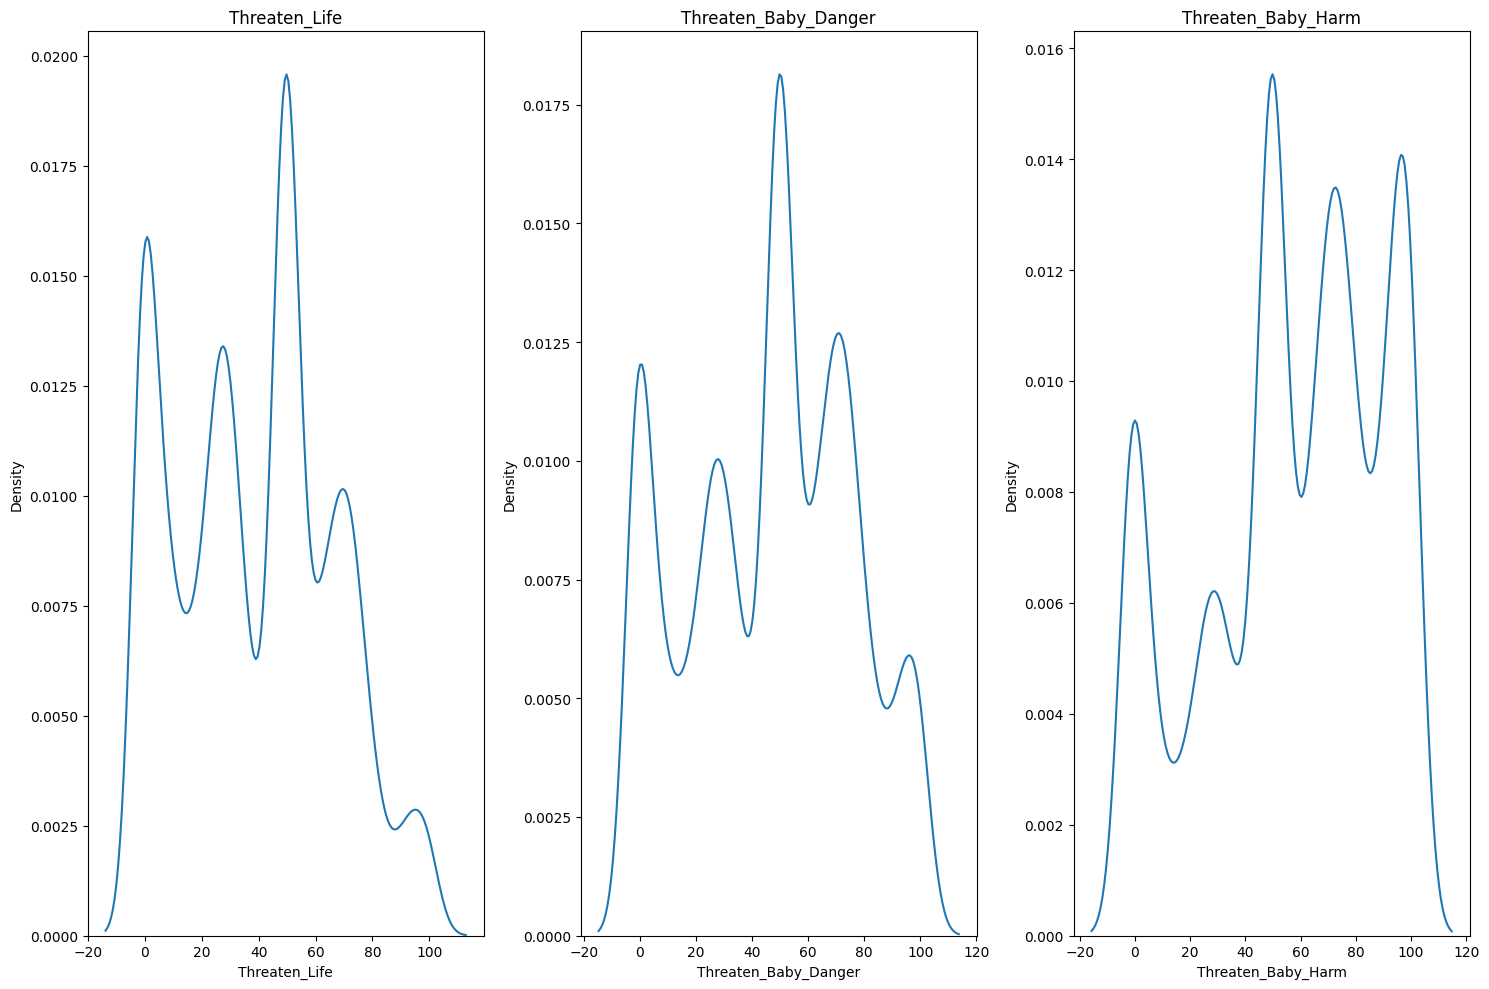

In [14]:
fig, axs= plt.subplots(1,3, figsize=(15,10))
axs= axs.flatten()

sns.kdeplot(data=df['Threaten_Life'].replace(' ',-1).astype('int'), ax=axs[0])
axs[0].set_title('Threaten_Life')

sns.kdeplot(data=df['Threaten_Baby_Danger'].replace(' ',-1).astype('int'), ax=axs[1])
axs[1].set_title('Threaten_Baby_Danger')

sns.kdeplot(data=df['Threaten_Baby_Harm'].replace(' ',-1).astype('int'), ax=axs[2])
axs[2].set_title('Threaten_Baby_Harm')


plt.tight_layout()
plt.show()

In [15]:
#BIVARIATA ANALYSIS.
df['Gestational_Age_At_Birth']= np.round(df['Gestational_Age_At_Birth']/4.33,2)

In [16]:
#lets create   column  for healthy birth weight
def healthy_weight(row):
  if pd.isnull(row['Birth_Weight']):
    return 'Data Missing'
  elif row['Birth_Weight']>2550 and row['Birth_Weight']<4000:
    return 'Healthy'
  else:
    return 'Unhealthy'



#lets create   column  for healthy birth height
def healthy_height(row):
  if pd.isnull(row['Birth_Length']):
    return 'Data Missing'
  elif row['Birth_Length']>39 and row['Birth_Length']<61:
    return 'Healthy'
  else:
    return 'Unhealthy'

In [17]:
df['Weight']= df.apply(healthy_weight, axis=1)
df['Height']= df.apply(healthy_height, axis=1)

In [18]:
df.head()

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm,Weight,Height
0,38.3,"$200,000+",Masters degree,9.0,13.0,9.17,Dec2020,49.20,3431.0,Vaginally,No,2,3,27,Healthy,Healthy
1,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2,33,92,Data Missing,Data Missing
2,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,Data Missing,Data Missing
3,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,8.91,Dec2020,41.00,2534.0,Vaginally,No,53,67,54,Unhealthy,Healthy
4,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,9.21,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,23,32,71,Healthy,Healthy


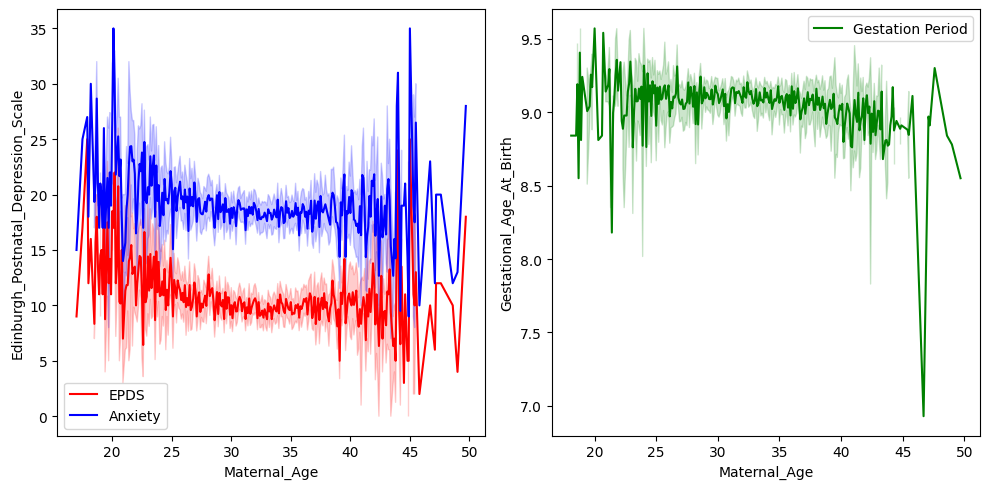

In [19]:
#Analysis

fig,axs= plt.subplots(1,2, figsize=(10,5))
axs= axs.flatten()

sns.lineplot(x='Maternal_Age', y='Edinburgh_Postnatal_Depression_Scale', data=df, ax=axs[0],color='red' ,label='EPDS')
sns.lineplot(x='Maternal_Age', y='PROMIS_Anxiety', data=df, ax=axs[0],color='blue' ,label='Anxiety')

sns.lineplot(x='Maternal_Age', y='Gestational_Age_At_Birth', data=df, ax=axs[1],color='green' ,label='Gestation Period')


plt.tight_layout()
plt.show()


<Axes: xlabel='Maternal_Age', ylabel='Threaten_Life'>

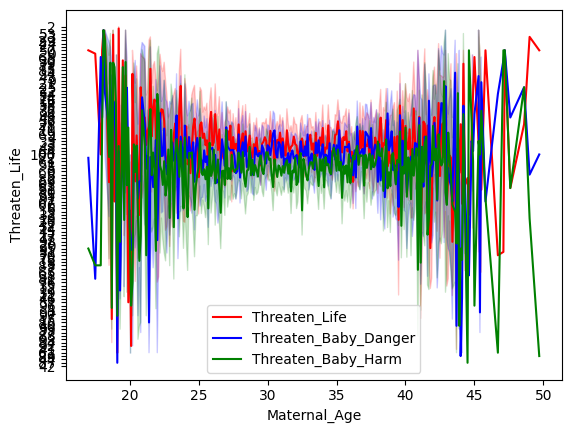

In [20]:
sns.lineplot(x='Maternal_Age', y='Threaten_Life', data=df, color='red' ,label='Threaten_Life')
sns.lineplot(x='Maternal_Age', y='Threaten_Baby_Danger', data=df, color='blue' ,label='Threaten_Baby_Danger')
sns.lineplot(x='Maternal_Age', y='Threaten_Baby_Harm', data=df, color='green' ,label='Threaten_Baby_Harm')

In [21]:
new_df= df[df['Delivery_Mode'].notnull()]

In [22]:
new_df= new_df[['Delivery_Mode','Maternal_Age']]


def age_category(row):
  if(row['Maternal_Age']<23):
    return 'UnderAge'
  if(row['Maternal_Age']>=23 and row['Maternal_Age']<38):
    return 'Healthy'
  else:
    return 'Old Age'


new_df['Age_Category']= new_df.apply(age_category, axis=1)

In [23]:
new_df.groupby("Age_Category")['Delivery_Mode'].value_counts().reset_index()

,Age_Category,Delivery_Mode,count
0,Healthy,Vaginally,3534
1,Healthy,Caesarean-section (c-section),1381
2,Old Age,Vaginally,327
3,Old Age,Caesarean-section (c-section),236
4,UnderAge,Vaginally,43
5,UnderAge,Caesarean-section (c-section),16


In [24]:
cols =['NICU_Stay', 'Weight', 'Height']

In [25]:
#nicu- binary (t/F)
#weight, height= [UH/H]
#logistic classification.
    #independent variable - continous
    # dependent - binary

In [26]:
import statsmodels.api as sm
df['NICU_Stay']= df['NICU_Stay'].fillna("Data Missing")

In [27]:
import statsmodels.api as sm

for i in cols:
    # Selecting clean data
    df_1 = df[(df[i] != 'Data Missing') & (df['Maternal_Age'].notnull())]

    # Binary Conversion
    if i == 'NICU_Stay':
        df_1['binary'] = df_1[i].apply(lambda x: 1 if x == 'Yes' else 0)
    else:
        df_1['binary'] = df_1[i].apply(lambda x: 1 if x == 'Unhealthy' else 0)

    # Model
    X = df_1[['Maternal_Age']]  # Ensure X is a 2D DataFrame
    y = df_1['binary']

    X = sm.add_constant(X)  # Add constant for intercept
    logit_model = sm.Logit(y, X)

    try:
        result = logit_model.fit(disp=0)  # Suppress output during fitting
        p_value = result.pvalues['Maternal_Age']
        alpha = 0.3
        if p_value < alpha:
            print(f"There is a significant association between the age of pregnant women and likelihood of {i}")
        else:
            print(f"There is no significant association between the age of pregnant women and likelihood of {i}")
    except Exception as e:
        print(f"Error processing column {i}: {e}")


There is a significant association between the age of pregnant women and likelihood of NICU_Stay
There is a significant association between the age of pregnant women and likelihood of Weight
There is no significant association between the age of pregnant women and likelihood of Height


###CONCLUSIONS.

- If a lady is in the age group 25-38 while conceiving she will not be under any anxiety attacks , moreover she will also not suffer from any after-pregnancy depression and can take care of herself and her new born more effectively.

- If a female is conceiving beyond the age of 42, this is very risky for the baby as there are very high chances of pre-mature birth of the baby and the pre-mature birth may be in less than 7.5 months of gestation periods.

- Female of the age group 25-42 are less worried about the impact of covid-19 on them and their new born health, damang, they are less worried as compared to females who conceived in less than 25 and females conceiving in after the age 45. its also evident that female after the age of 43 are more worried about the impact of covid-19 on lady and baby , this may be reason for high anxiety and after-pregnency depression in this age group

- After the age of 38, there is a notable 13%[28-41%] increase in the likelihood of women requiring a c-section rather than opting for a natural delivery. this statistic underscores the physiological changes associated with maternal age and their implications for childbirth.

- On testing the relationship between maternal age and [ will the new born need intensive medical supervision after birth , healthy or unhealthy weight, healthy or unhealthy height] ,by hypothesis testing , it was found that there is a significant association between the age of pregnant women and the likelihood of NICU_Stay and babe having unhealthy weight, however there is no evidence for significant association between age and height of new born.

- High anxiety , depression , premature birth can be reason for admission of babe to NICU after delivery.

In [28]:
#household_income

In [29]:
categories = df['Household_Income'].unique()
categories

array(['$200,000+', '$100,000 -$124,999', '$40,000-$69,999',
       '$150,000 - $174,999', nan, '$70,000-$99,999',
       '$125,000- $149,999', '$175,000- $199,999', '$20,000- $39,999',
       'Less than $20, 000'], dtype=object)

In [30]:
import plotly.express as px

#get unique categories of income
categories = df['Household_Income'].unique()

for i  in categories:
  df= df[df['Household_Income']==i]
  fig= px.histogram(df, x='PROMIS_Anxiety', color='Household_Income',
                   title='Distribution of Anxiety by household income',
                    hover_data= df.columns)


fig.update_layout(
    xaxis_title="PROMIS_Anxiety",
    yaxis_title="Count",
    legend_title="Household Income",
    barmode= 'overlay'   #overlay histogram fro better comparison.
)

fig.show()

In [31]:
import plotly.express as px

#get unique categories of income
categories = df['Household_Income'].unique()

for i  in categories:
  df= mental_health[df['Household_Income']==i]
  fig= px.histogram(df, x='Edinburgh_Postnatal_Depression_Scale', color='Household_Income',
                   title='Distribution of EPDS by household income',
                    hover_data= df.columns)


fig.update_layout(
    xaxis_title="Edinburgh_Postnatal_Depression_Scale",
    yaxis_title="Count",
    legend_title="Household Income",
    barmode= 'overlay'   #overlay histogram fro better comparison.
)

fig.show()

In [32]:
df_1 =  df[df['Threaten_Life']!=' ']
df_1['Threaten_Life']= df_1['Threaten_Life'].astype('int')

In [33]:
df_1.groupby('Household_Income')['Threaten_Life'].mean().reset_index().sort_values('Threaten_Life', ascending=False)

,Household_Income,Threaten_Life


 i will  contuneing